# Homework 3 (kny4)

## Classifier

In [68]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import*

In [69]:
path = '/home/kny4/cs344/hw03/buildings'

In [70]:
img = get_image_files(path)

In [71]:
dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path),
    valid_pct=0.2, seed=50,
    label_func=parent_label,
    item_tfms=Resize(128),
    bs = 2) 

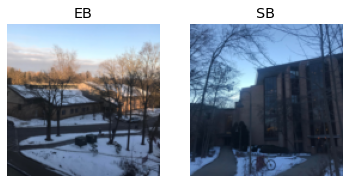

In [72]:
dls.valid.show_batch(max_n=4, nrows=1)

In [73]:
learn = cnn_learner(dls, arch=resnet18, metrics=error_rate)
learn.fine_tune(epochs=4)

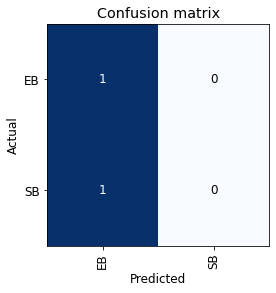

In [74]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

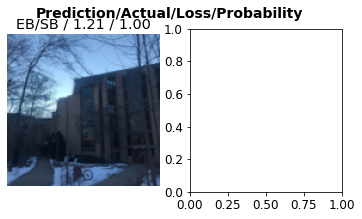

In [75]:
interp.plot_top_losses(2, nrows=1)

In [76]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [77]:
learn.export()

In [78]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [79]:
learn_inf = load_learner(path/'export.pkl')

In [80]:
learn_inf.predict('/home/kny4/Desktop/engineeringbuilding17.jpeg')

('EB', TensorBase(0), TensorBase([0.8663, 0.1337]))

In [81]:
learn_inf.dls.vocab

['EB', 'SB']

In [27]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [82]:
img = PILImage.create(btn_upload.data[-1])

In [83]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [84]:
pred,pred_idx,probs = learn_inf.predict(img)

In [85]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: EB; Probability: 0.8663')

In [86]:
interp.print_classification_report()

              precision    recall  f1-score   support

          EB       0.50      1.00      0.67         1
          SB       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/opt/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Testing

In [61]:
test_path = Path('/home/kny4/cs344/hw03/testing')
test_image_files = get_image_files(test_path)

In [62]:
test_dl = dls.test_dl(test_image_files, with_labels=True)

In [63]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

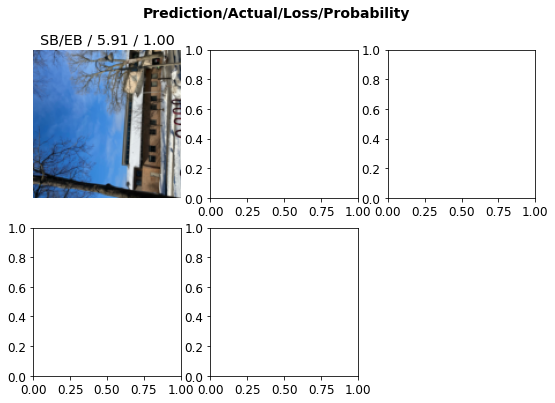

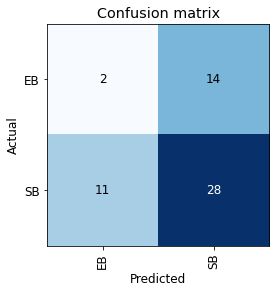

In [64]:
interp.plot_top_losses(k = 5)
interp.plot_confusion_matrix()

In [65]:
interp.print_classification_report()

              precision    recall  f1-score   support

          EB       0.15      0.12      0.14        16
          SB       0.67      0.72      0.69        39

    accuracy                           0.55        55
   macro avg       0.41      0.42      0.41        55
weighted avg       0.52      0.55      0.53        55



In [66]:
accuracy(interp.preds, interp.targs)

TensorBase(0.5455)

## Metadata About Both Datasets
1. The two buildings used were the Engineering Building (EB) and the Science Building (SB).
2. The original training data sets were had 5 images for EB and 6 images for SB. The testing data sets had 16 images for EB and 38 images for SB (courtesy of Brea Koenes).

## Task Report
1. Metadata about original  dataset: 
         
                precision    recall  f1-score   support
          EB       0.50      1.00      0.67         1
          SB       0.00      0.00      0.00         1
          
2. Metadata about test dataset: 

              precision    recall  f1-score   support
          EB       0.15      0.12      0.14        16
          SB       0.67      0.72      0.69        39 
          
3. Accuracy range estimated on Homework 2: 0.5-0.6
4. Accuracy obtained on test set: 0.55
5. The accuracy obtained on the test set is within the range estimated form the original set.
6. The factors involved in this accuracy were the images used. While the test dataset had more images, the original set contained a greater variety of images. The test dataset had very similar pictures of the two buildings, which means while the original dataset trained the dataset to recognize the buildings from multiple angles, the test dataset only tests one of the training images used to create the classifier. Logically, it would make sense that the classifier would then be limited in its accuracy.
